**Indian Liver Patient Dataset**

https://www.kaggle.com/datasets/uciml/indian-liver-patient-records

https://www.openml.org/search?type=data&sort=runs&status=active&id=1480

**Dataset**

Zawiera 583 obserwacje.

Klasa decyzyjna:

- 1 - pacjent z chorobami wątroby

- 2 - pacjent bez chorób wątroby


10 atrybutów: 

- Wiek pacjenta. Każdy pacjent, którego wiek przekroczył 89 lat, jest wymieniony jako „90”. - cecha ilościowa 

- Płeć pacjenta - cecha nominalna: Male / Female 

- Bilirubina całkowita - cecha ilościowa

- Bilirubina bezpośrednia - cecha ilościowa

- Fosfataza alkaliczna Alphos - cecha ilościowa

- Aminotransferaza alaninowa Sgpt - cecha ilościowa

- Sgot Aminotransferaza asparaginianowa - cecha ilościowa

- Białka ogółem - cecha ilościowa

- Albumina - cecha ilościowa

- Stosunek A/G Albuminy i Globuliny -cecha ilościowa

 

Przykładowa obserwacja:

- Wiek pacjenta: 69

- Płeć pacjenta: Male

- Bilirubina całkowita: 0.8

- Bilirubina bezpośrednia: 0.2

- Fosfataza alkaliczna Alphos: 215

- Aminotransferaza alaninowa Sgpt: 24

- Sgot Aminotransferaza asparaginianowa: 17

- Białka ogółem: 6.3

- Albumina: 3.0

- Stosunek A/G Albuminy i Globuliny: 0.9

- Klasa decyzyjna: Pacjent bez chorób wątroby

Przykładowa obserwacja:

- Wiek pacjenta: 40

- Płeć pacjenta: Male

- Bilirubina całkowita: 1.9

- Bilirubina bezpośrednia: 1.0

- Fosfataza alkaliczna Alphos: 231

- Aminotransferaza alaninowa Sgpt: 16

- Sgot Aminotransferaza asparaginianowa: 55

- Białka ogółem: 4.3

- Albumina: 1.6

- Stosunek A/G Albuminy i Globuliny: 0.6

- Klasa decyzyjna: Pacjent bez chorób wątroby

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [2]:
ds_path = Path('./indian_liver_patient.csv')
df = pd.read_csv(ds_path, delimiter=',')
df.rename(columns = {"Albumin_and_Globulin_Ratio": "A-G Ratio", "Dataset":"Class"}, inplace = True)
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns')
df.Class.value_counts()

There are 583 rows and 11 columns


1    416
2    167
Name: Class, dtype: int64

In [3]:
df.head(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,A-G Ratio,Class
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
for a,c in zip(df.columns, df.dtypes):
    print(f"{a} - {c}")

Age - int64
Gender - object
Total_Bilirubin - float64
Direct_Bilirubin - float64
Alkaline_Phosphotase - int64
Alamine_Aminotransferase - int64
Aspartate_Aminotransferase - int64
Total_Protiens - float64
Albumin - float64
A-G Ratio - float64
Class - int64


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
Total_Bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
Direct_Bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
Alkaline_Phosphotase,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
Alamine_Aminotransferase,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
Aspartate_Aminotransferase,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
Total_Protiens,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
Albumin,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
A-G Ratio,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8
Class,583.0,1.286449,0.452490,1.0,1.0,1.00,2.0,2.0


**Preprocessing**

In [6]:
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)
df = DataFrameImputer().fit_transform(df)
df['Class'] = df['Class'].map({2:0,1:1})

In [7]:
df['Gender'] =  pd.get_dummies(df['Gender'])['Male']

**Rozkład wartości atrybutów**

<Figure size 1700x2000 with 0 Axes>

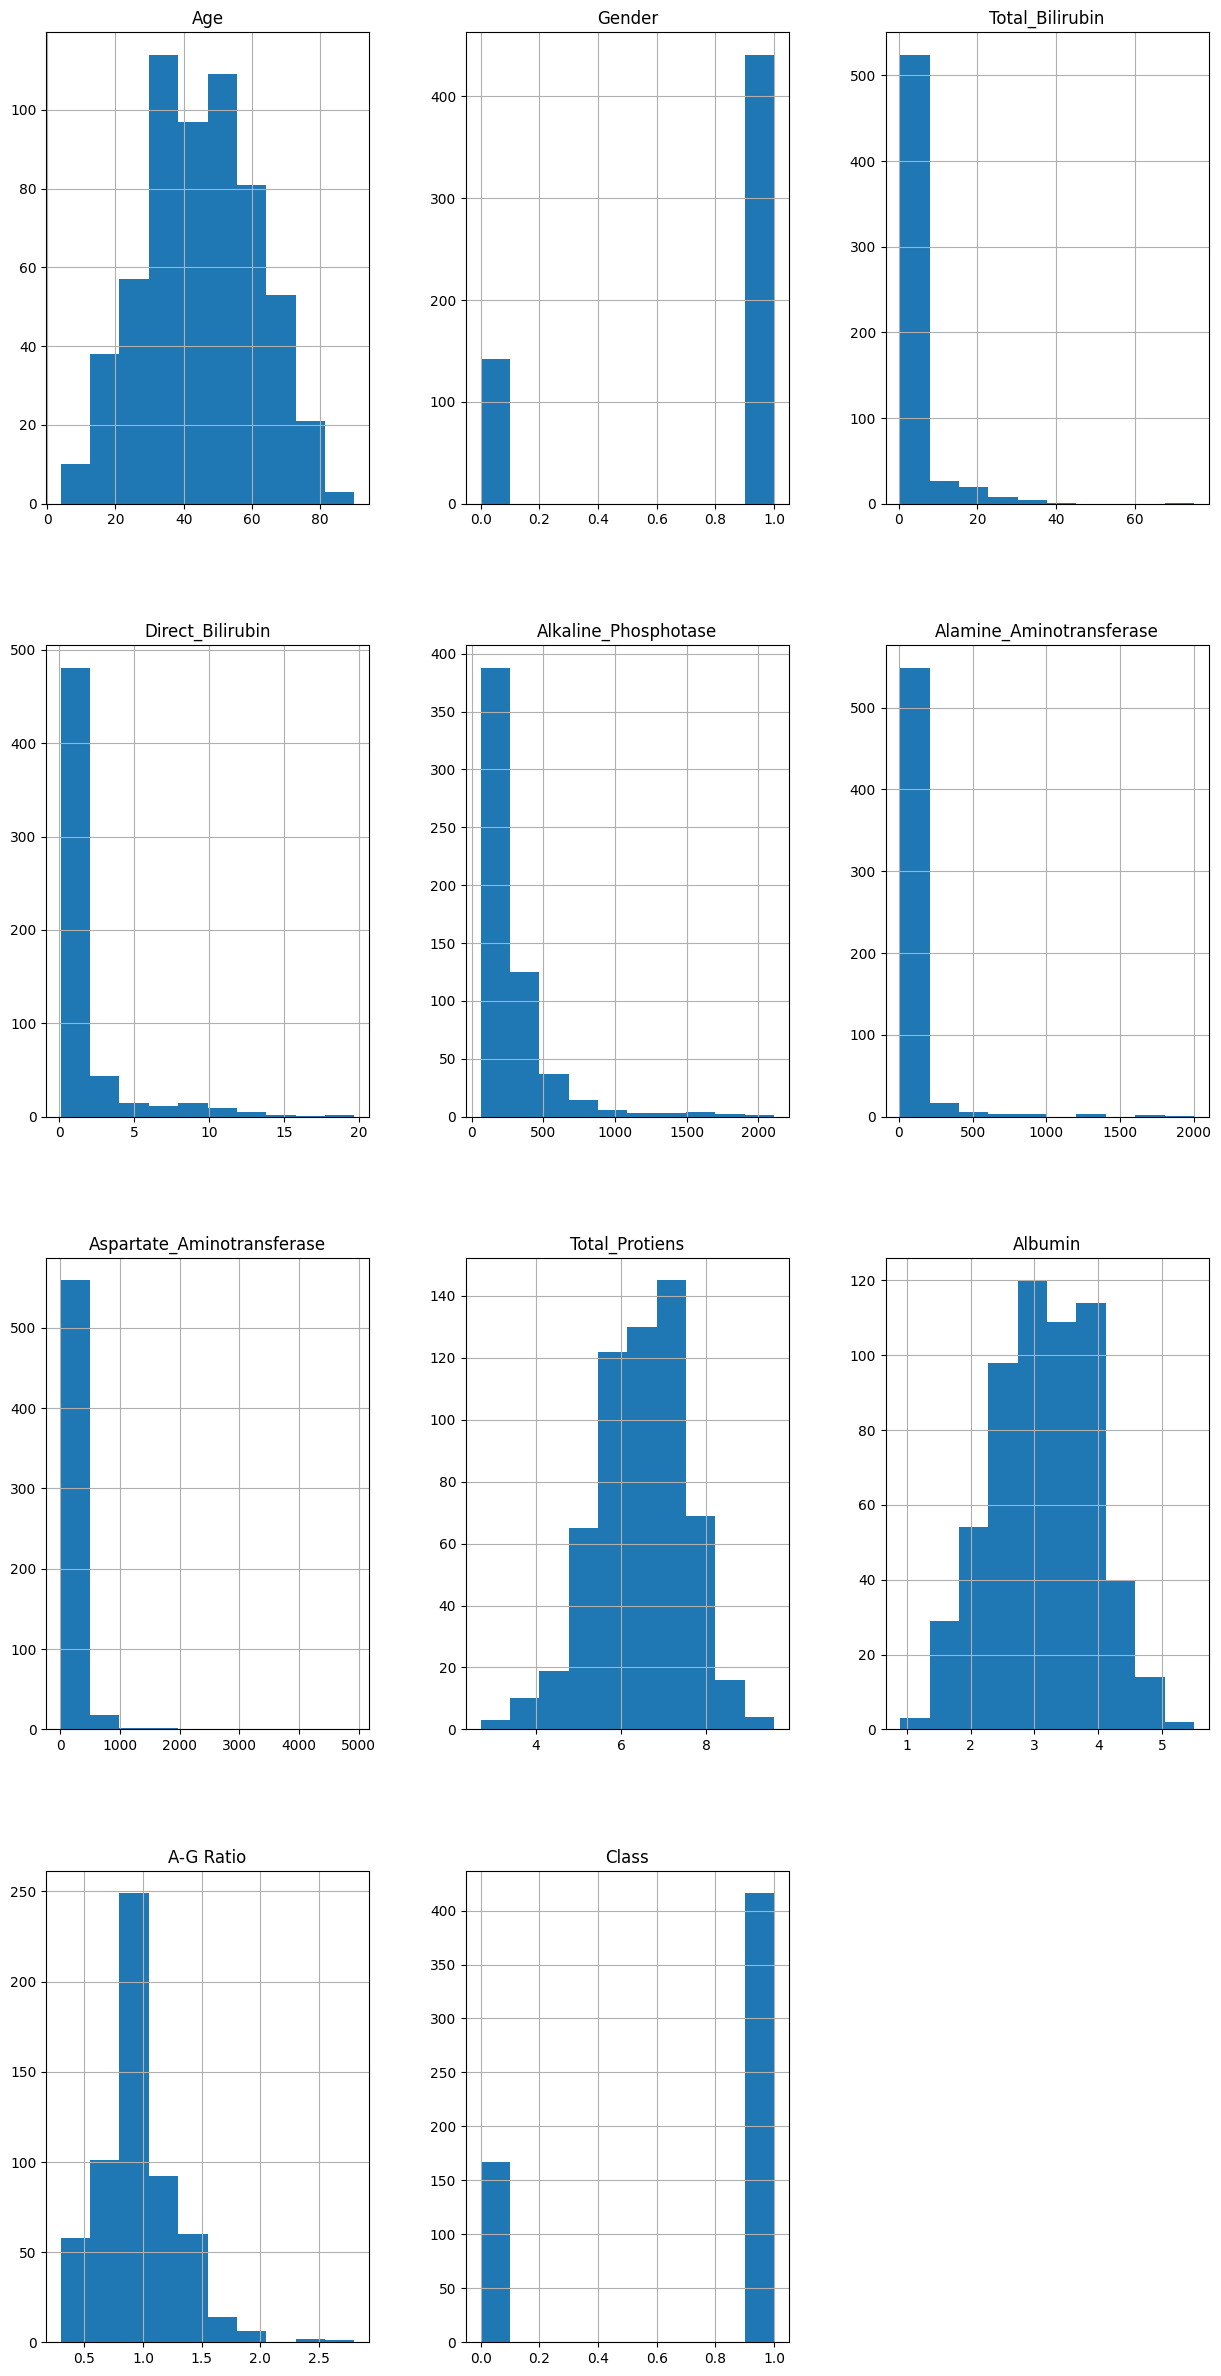

In [8]:
plt.figure(figsize=(17,20))
df.hist(layout=(4,3), figsize=(15,30))
plt.show()

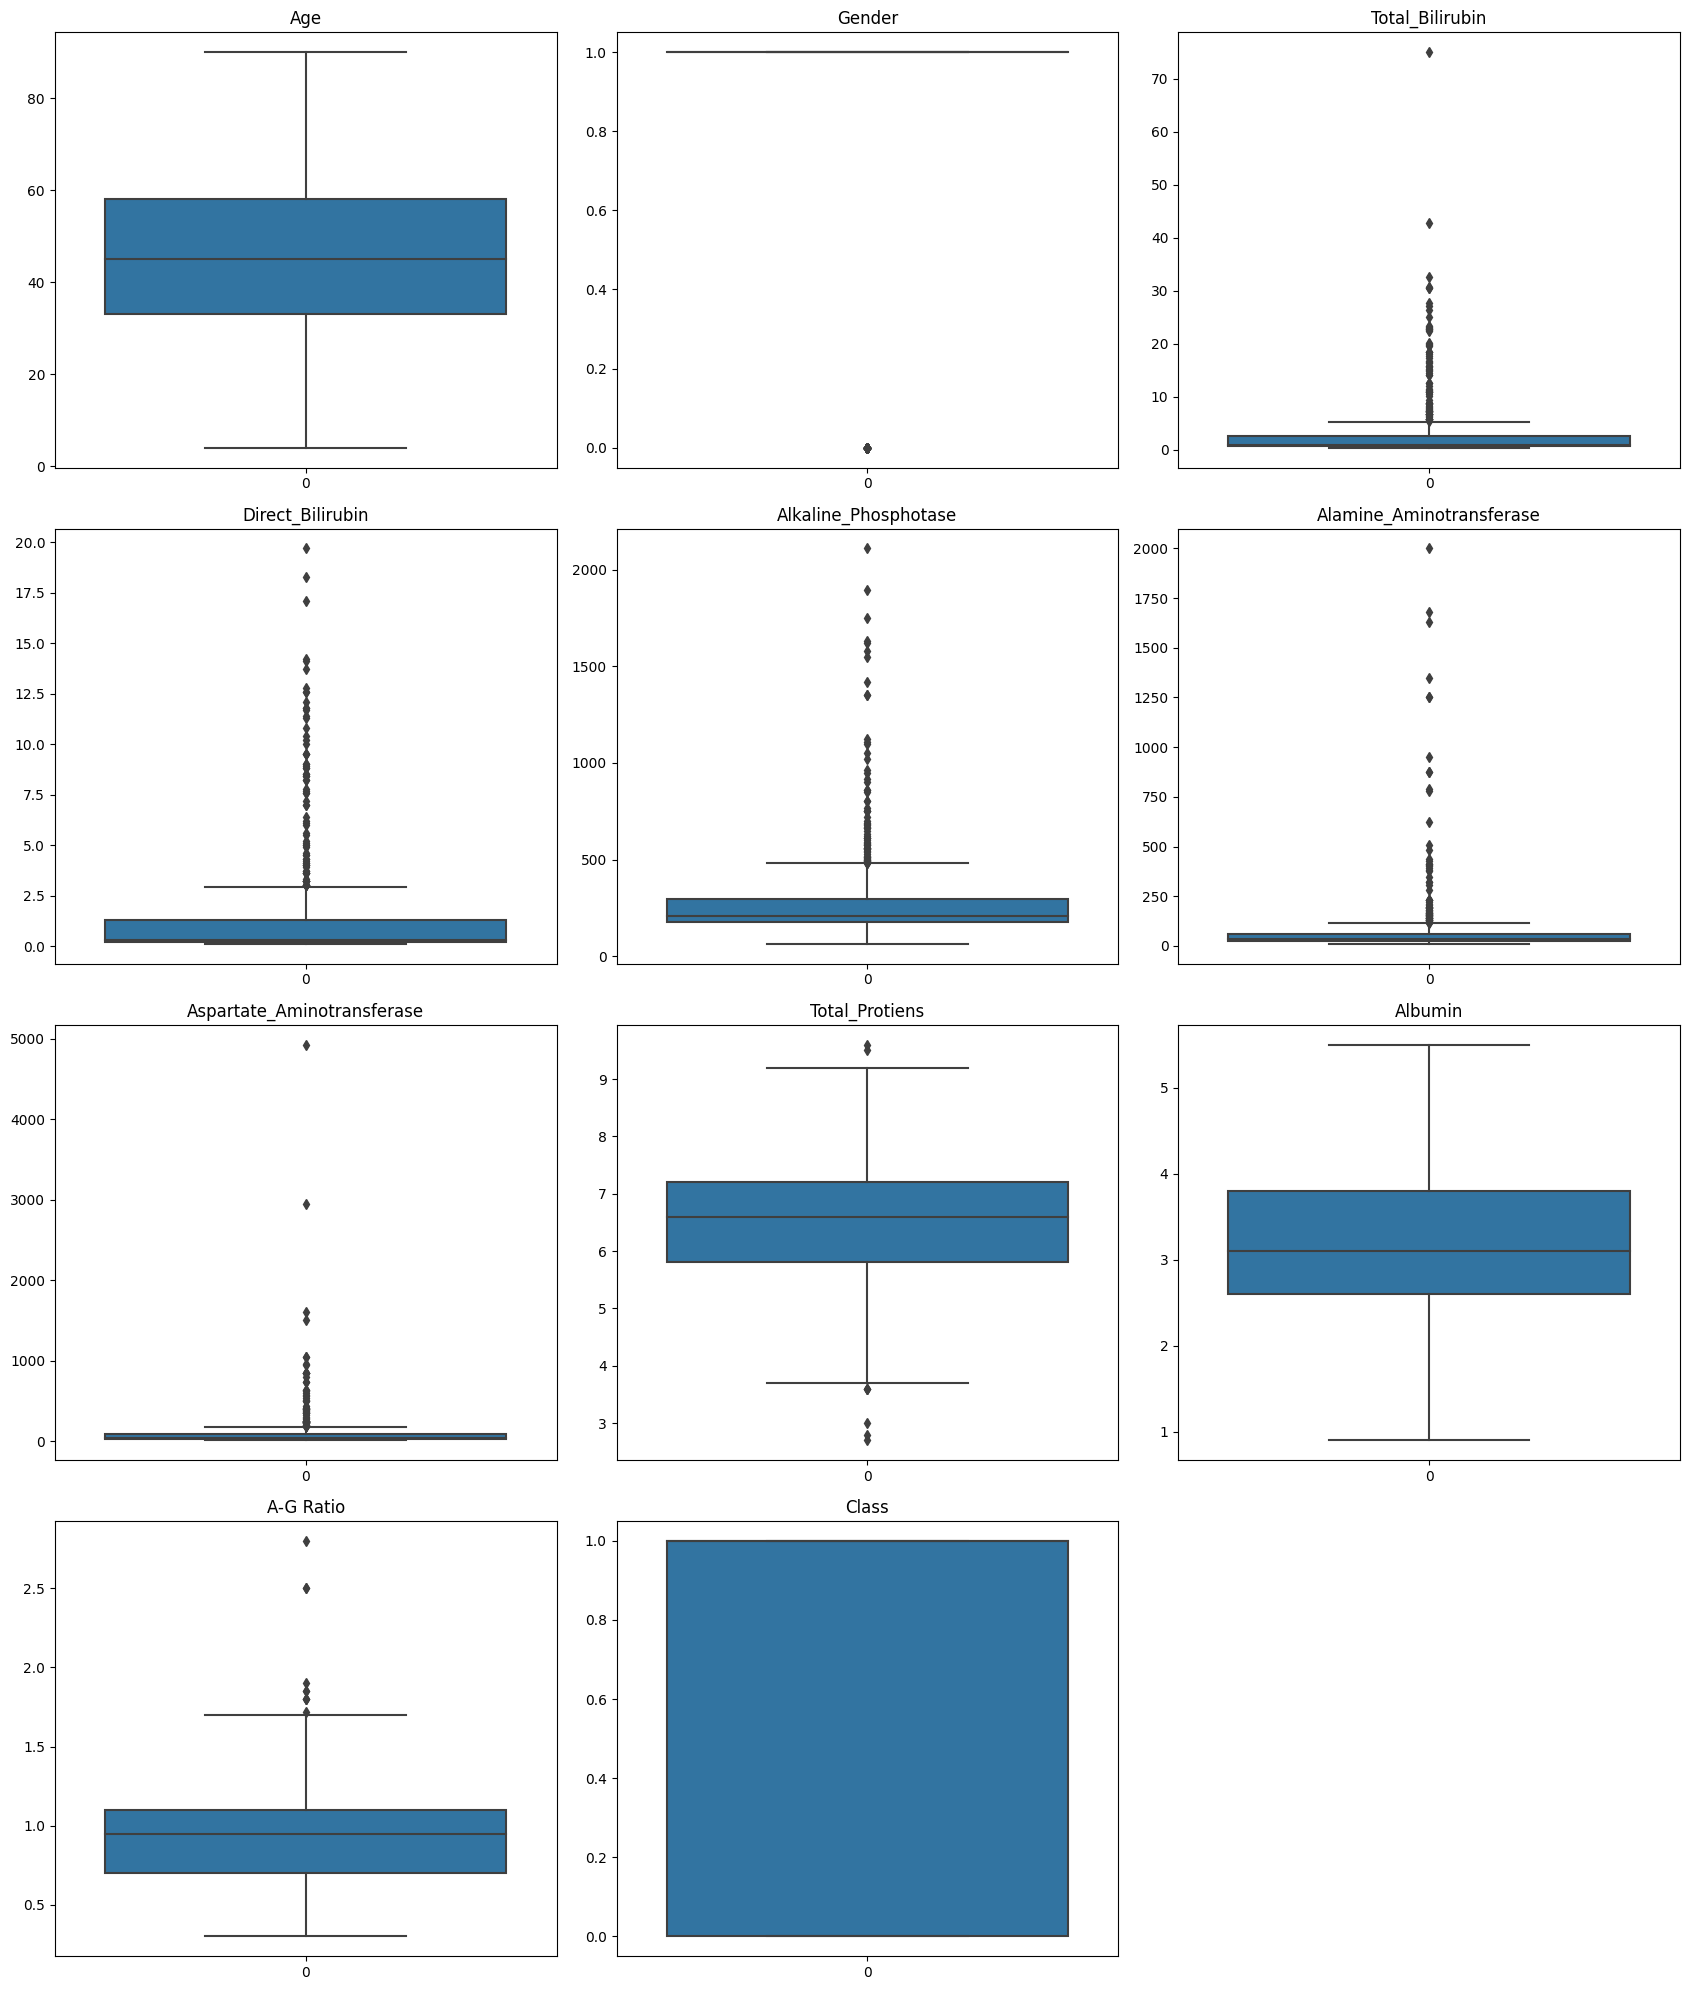

In [9]:
plt.figure(figsize=(17,20))
for i, col in enumerate(df.columns):
    plt.subplot(4, 3, i+1)
    sns.boxplot(df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

**Korelacje**

<Axes: >

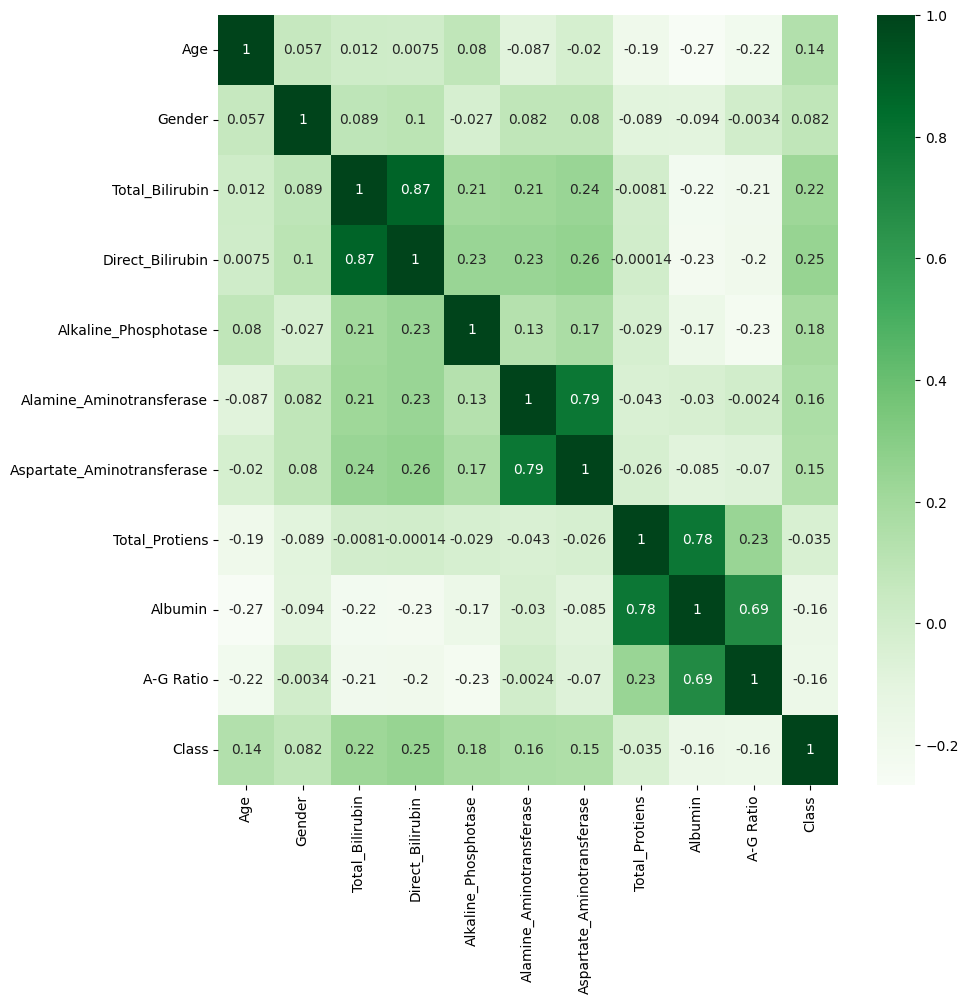

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True,cmap ='Greens')

**Rozkłady z podziałem na atrybucie decyzyjnym**

**Klasyfikacja**

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import make_scorer, confusion_matrix,ConfusionMatrixDisplay,RocCurveDisplay, roc_auc_score, accuracy_score, precision_score
from imblearn.pipeline import Pipeline
from imblearn.metrics import geometric_mean_score, sensitivity_score, specificity_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


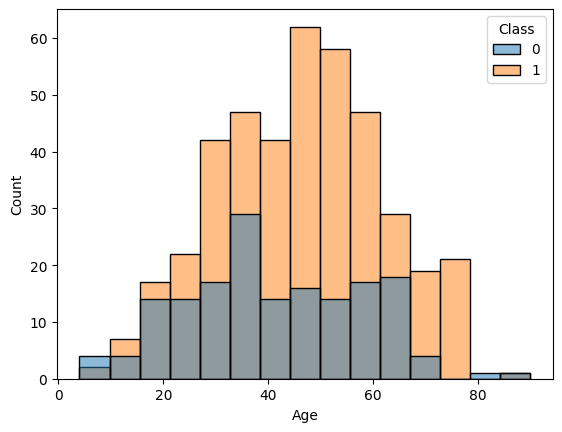

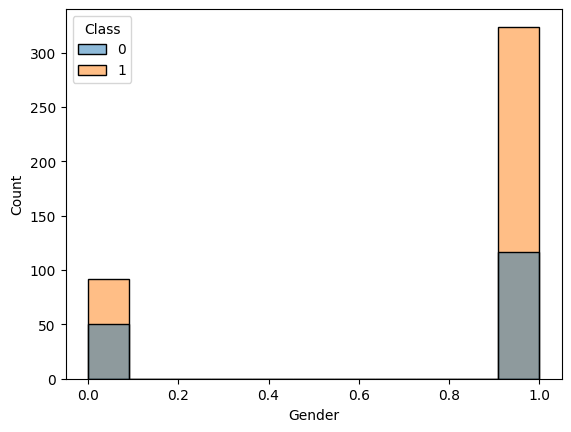

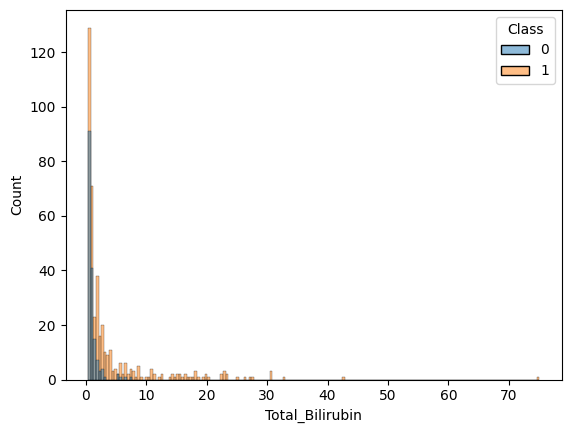

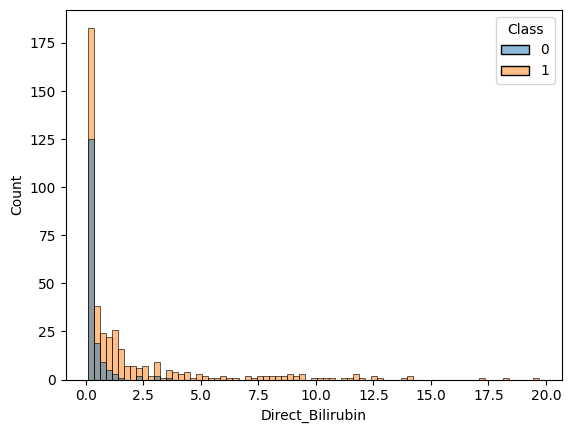

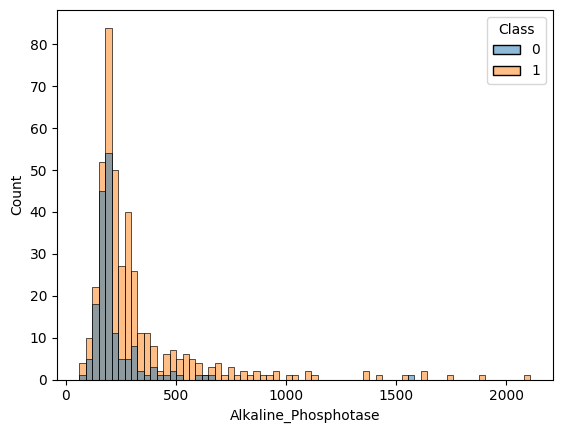

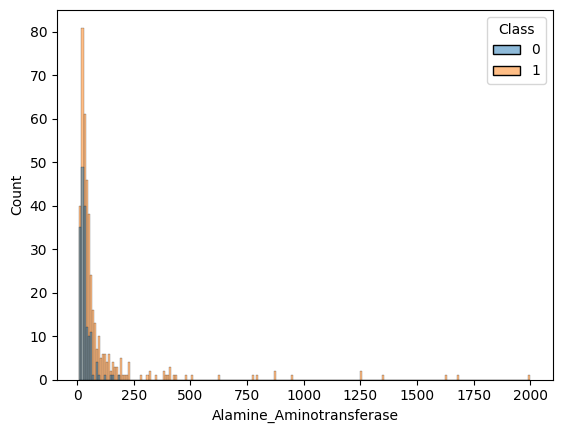

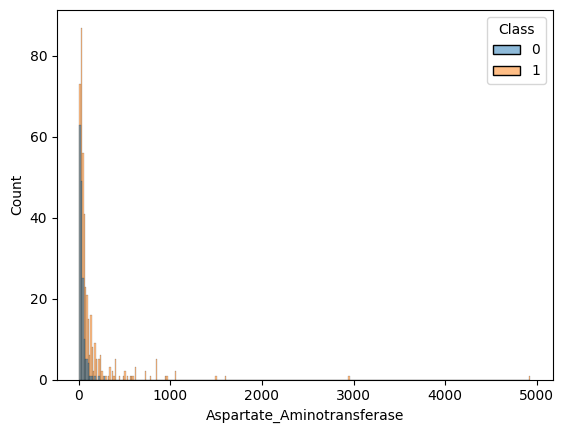

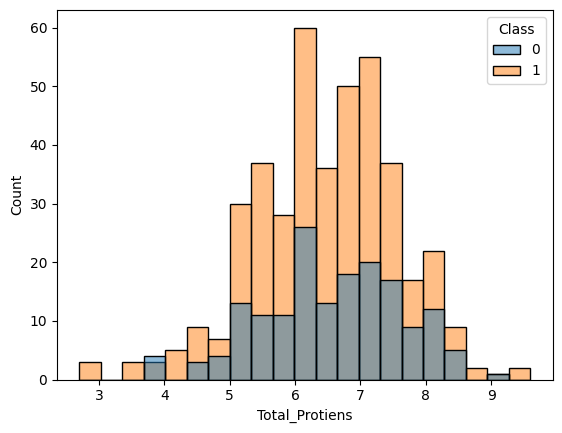

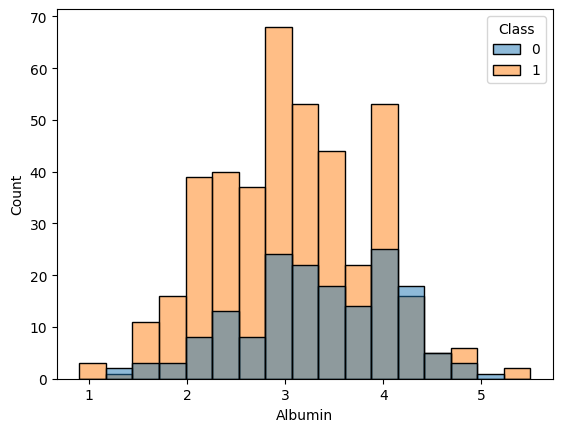

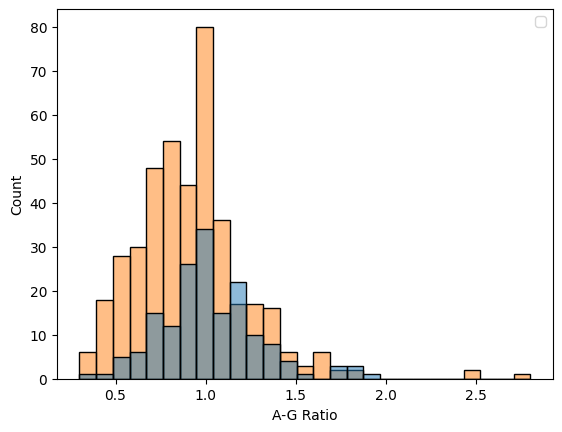

In [12]:

for variable in ['Age','Gender','Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'A-G Ratio']:
   mini, maxi = df[variable].min(), df[variable].max()
   fig, ax = plt.subplots()
   sns.histplot(data=df,x=variable, hue=df.Class, ax=ax )        
plt.legend()


In [22]:
ds = df.copy()
X = ds.drop(columns=['Class'])
y = ds.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42, stratify=y)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

NameError: name 'Y_test' is not defined

In [85]:
metrics = ['precision', 'recall', 'accuracy']
def _run(model,model_name, X, y):
    results =  cross_validate(model, X, y, cv=4, n_jobs=4,
        scoring=dict(precision=make_scorer(precision_score), recall=make_scorer(sensitivity_score), accuracy=make_scorer(accuracy_score)),
        return_train_score=True, return_estimator=True)
    res = []
    data = {}
    
    for metric in metrics:
        xs = results['test_'+metric]
        data[metric] = xs
        res += [dict(mean=np.mean(xs), std=np.std(xs))]
    res = pd.DataFrame(res, index=metrics)
    data = pd.DataFrame(data)
    data = data.mean()
    data['model'] = model_name
    print(data)
    ##test
    model.fit(X_train_std, y_train)
    predictions = model.predict(X_test_std)
    cm = confusion_matrix(y_test, predictions, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()
    svc_disp = RocCurveDisplay.from_estimator(model, X_test_std, y_test)
    Y_test = model.predict(X_test_std)
    report_test = dict(model=model_name, precision=precision_score(y_test, Y_test), recall=sensitivity_score(y_test, Y_test>0.5), accuracy=accuracy_score(y_test, Y_test > 0.5))
    
    return data, report_test
    

precision                      0.714596
recall                              1.0
accuracy                       0.714596
model        GradientBoostingClassifier
dtype: object


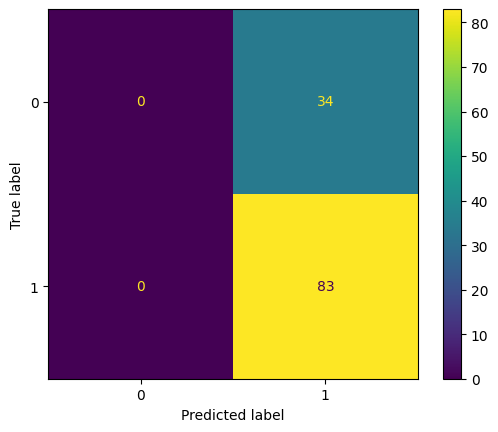

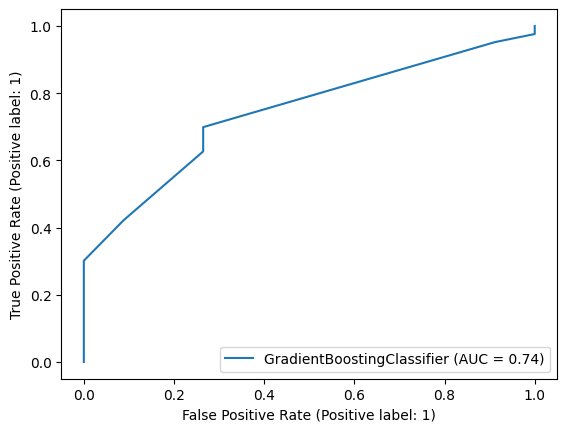

In [93]:
model = GradientBoostingClassifier(n_estimators=1, learning_rate=0.1, max_depth=3, random_state=42)
report1, report_test1 = _run(model, 'GradientBoostingClassifier', X_train_std, y_train)

C:\Users\jesmok\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


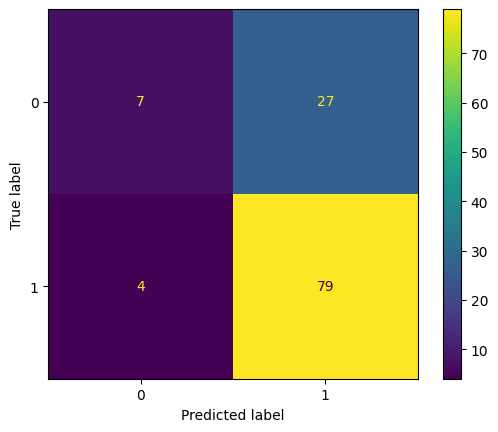

In [87]:
model = LogisticRegression(max_iter=900)
model.fit(X_train, y_train)
predictions = model.predict(X_test.to_numpy())
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

precision                   0.75197
recall                     0.879984
accuracy                   0.706012
model        RandomForestClassifier
dtype: object


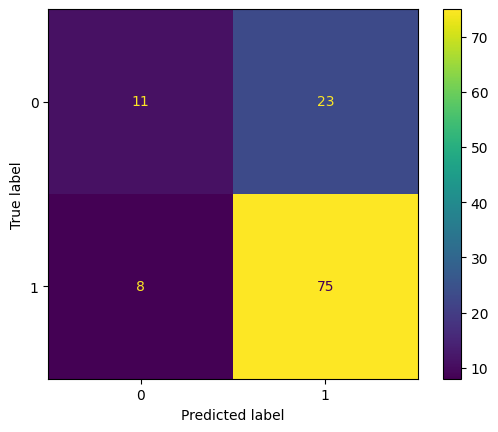

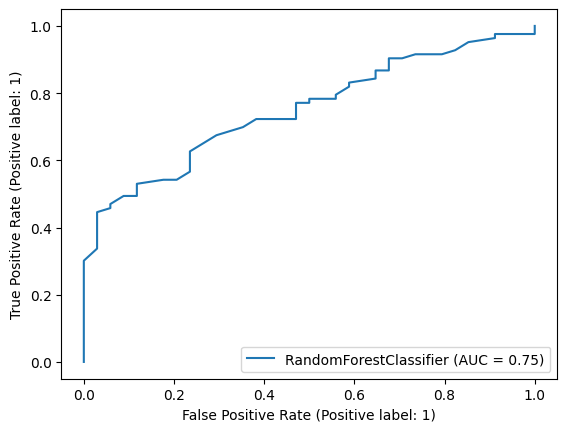

In [88]:
model = RandomForestClassifier(n_estimators=100)
report2, report_test2 = _run(model, 'RandomForestClassifier', X_train_std, y_train)

precision                  0.720753
recall                     0.936926
accuracy                    0.69531
model        DecisionTreeClassifier
dtype: object


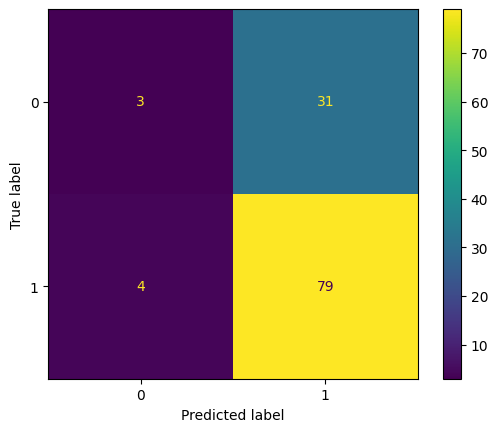

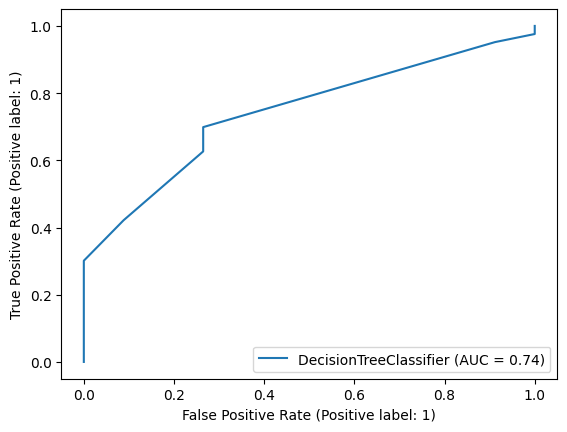

In [89]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)
report3, report_test3 = _run(model, 'DecisionTreeClassifier', X_train_std, y_train)


precision              0.736665
recall                 0.948903
accuracy                0.72097
model        LogisticRegression
dtype: object


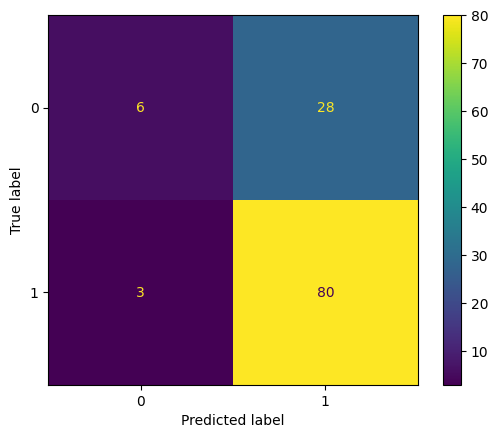

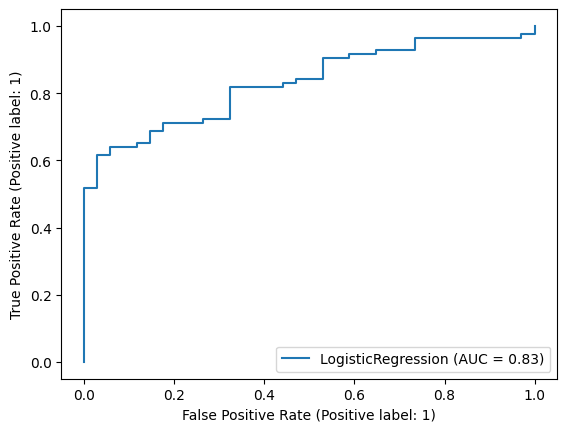

In [90]:
model =  LogisticRegression(max_iter=900)
report4, report_test4 = _run(model, 'LogisticRegression', X_train_std, y_train)

<Axes: xlabel='model'>

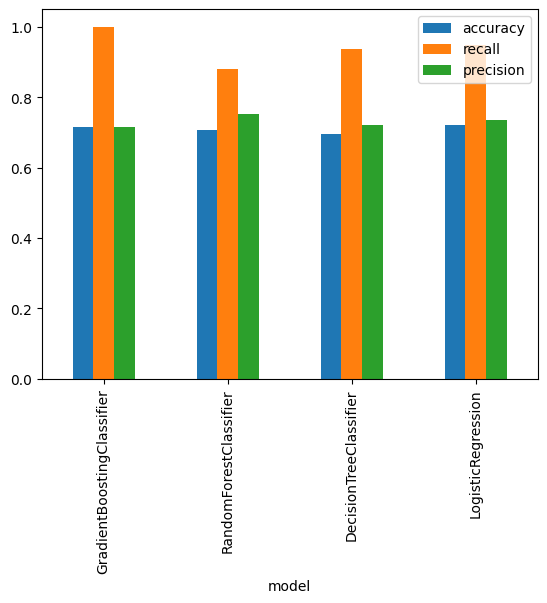

In [91]:
reports = pd.concat([report1,report2,report3,report4],axis=1)
reports = reports.transpose()

reports.plot(x="model", y=['accuracy','recall','precision'],kind="bar")

                        model  precision    recall  accuracy
0  GradientBoostingClassifier   0.709402  1.000000  0.709402
1      RandomForestClassifier   0.765306  0.903614  0.735043
2      DecisionTreeClassifier   0.718182  0.951807  0.700855
3          LogisticRegression   0.740741  0.963855  0.735043


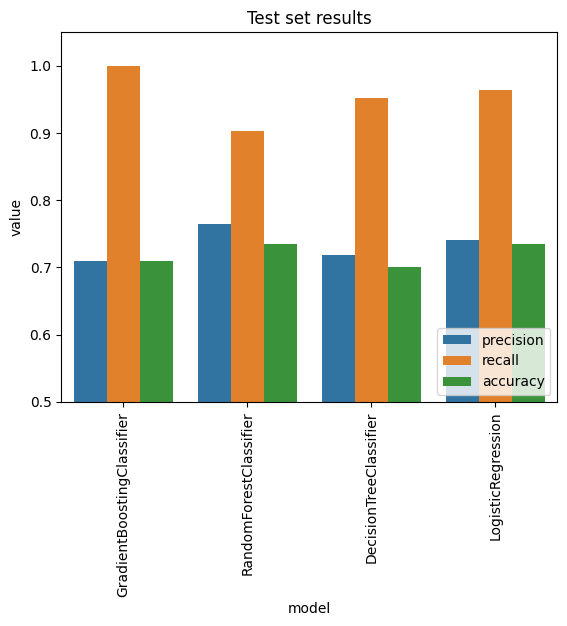

In [92]:
report = pd.DataFrame([report_test1, report_test2, report_test3,report_test4])
print(report)
report = pd.melt(report, id_vars='model', value_vars=metrics, var_name='metric')
sns.barplot(x='model', y='value', hue='metric', data=report)
plt.title('Test set results')
plt.xticks(rotation=90)
plt.legend(loc='lower right')
plt.ylim(0.5)
plt.show()